<a href="https://colab.research.google.com/github/paulohenriquesilva3m/paulohenriquesilva3m/blob/main/review_sistemas_de_recomendacao_modified_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Review Sistemas de Recomendação**



![](https://raw.githubusercontent.com/cmcouto-silva/pictures/main/recommender_systems/non_personalized_recommender.png)

![](https://raw.githubusercontent.com/cmcouto-silva/pictures/main/recommender_systems/recommender_system_diagram.png)

![](https://raw.githubusercontent.com/cmcouto-silva/pictures/main/recommender_systems/ContentBasedFiltering_vs_CollaborativeFiltering.png)

# Import libraries and datasets

In [ ]:
%pip install scikit-surprise

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity

**Upload file steam-200k.csv**

Schema:

| Column    | Type   | Description
|-----------|--------|-------------
| user_id   | int    | User identifier
| item_id   | string | Name of the steam game
| behaviour | string | Behavior name (purchase/play)
| hours     | float  | Hours if behavior is play, 1.0 if behavior is purchase
| blank     | int    | Column to ignore

Source: [Steam Video Games (Kaggle)](https://www.kaggle.com/datasets/tamber/steam-video-games?resource=download)

In [ ]:
df = pd.read_csv(
    'steam-200k (1).csv',
    header=None, names=['user_id', 'item_id', 'behaviour', 'hours', 'blank']
    )
df.drop(columns=['blank'], inplace=True)
print(df.shape)
df.head()

(200000, 4)


,user_id,item_id,behaviour,hours
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    200000 non-null  int64  
 1   item_id    200000 non-null  object 
 2   behaviour  200000 non-null  object 
 3   hours      200000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.1+ MB


# Non-personalized Recommendations

## Top Purchased Games

Recommend the N most purchased games for all users

In [ ]:
df.head()

,user_id,item_id,behaviour,hours
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0


In [ ]:
def recommend_top_purchased_games(df, n):
    """
    Recommend the N most purchased games for all users
    """
    df_top_purchased_games = (
        df[df['behaviour']=='purchase']
        .groupby('item_id')['hours']
        .sum()
        .sort_values(ascending=False)
        .to_frame('n_purchases')
        .head(n)
    )

    return df_top_purchased_games

# Apply function
recommend_top_purchased_games(df, n=10)

,n_purchases
item_id,
Dota 2,4841.0
Team Fortress 2,2323.0
Unturned,1563.0
Counter-Strike Global Offensive,1412.0
Half-Life 2 Lost Coast,981.0
Counter-Strike Source,978.0
Left 4 Dead 2,951.0
Counter-Strike,856.0
Warframe,847.0


## Top Played Games

Recommend the N most played games

In [ ]:
def recommend_top_played_games(df, n):
    """
    Recommend the N most played games
    """

    df_top_played_games = (
        df[df['behaviour']=='play']
        .groupby('item_id')['hours']
        .sum()
        .sort_values(ascending=False)
        .to_frame('n_hours_played')
        .head(n)
    )

    return df_top_played_games

# Apply function
recommend_top_played_games(df, n=3)

,n_hours_played
item_id,
Dota 2,981684.6
Counter-Strike Global Offensive,322771.6
Team Fortress 2,173673.3


## Also Played Games

Recommend the N games that were played by users who also played the given game

In [ ]:
def also_played(df, game, n):

    users_who_played_game = df[(df['item_id']==game) & (df['behaviour']=='play')].user_id.unique()

    df_also_played = (
        df[(df['user_id'].isin(users_who_played_game)) & (df['behaviour']=='play')]
        .groupby('item_id')['hours']
        .sum()
        .sort_values(ascending=False)
        .drop(game)
        .head(n)
    )

    return df_also_played

# Apply function
also_played(df, game='The Elder Scrolls V Skyrim', n=10)

,hours
item_id,
Dota 2,88348.4
Counter-Strike Global Offensive,59552.3
Team Fortress 2,37129.0
Sid Meier's Civilization V,19174.2
Garry's Mod,13983.7
Borderlands 2,13286.8
Terraria,12394.0
Arma 3,10372.2
Total War ROME II - Emperor Edition,10043.9


## Plots

In [ ]:
# top_purchased_games
# top_played_games
# also_played_games

top_purchased_games = recommend_top_purchased_games(df, n=10).reset_index()
top_played_games = recommend_top_played_games(df, n=10).reset_index()
also_played_games = also_played(df, game='Dota 2', n=10).reset_index()

In [ ]:
top_purchased_games.head()

,item_id,n_purchases
0,Dota 2,4841.0
1,Team Fortress 2,2323.0
2,Unturned,1563.0
3,Counter-Strike Global Offensive,1412.0
4,Half-Life 2 Lost Coast,981.0


<ipython-input-87-314f884a2942>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x=x, y=y, palette='Blues_r', zorder=2)


<Axes: title={'center': 'Top Purchased Games'}, xlabel='Score', ylabel='Games'>

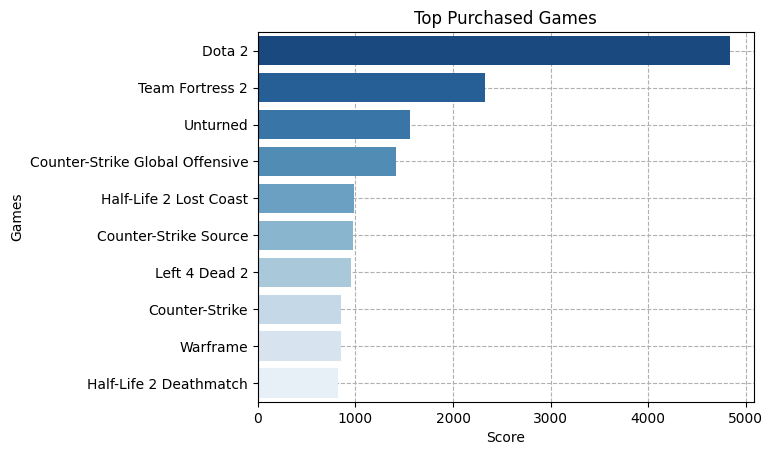

In [ ]:
# plot_non_personalized_recommendations

def plot_non_personalized_recommendations(df : pd.DataFrame, x : str, y : str, title : str='Non-personalized recommendations', figsize=(16, 8)):
    """Plots top n games in Steam"""
    ax = sns.barplot(data=df, x=x, y=y, palette='Blues_r', zorder=2)
    ax.set(xlabel='Score', ylabel='Games', title=title)
    ax.grid(True, linestyle='--', zorder=0)

    return ax

plot_non_personalized_recommendations(top_purchased_games, x='n_purchases', y='item_id', title='Top Purchased Games')

<ipython-input-87-314f884a2942>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x=x, y=y, palette='Blues_r', zorder=2)


<Axes: title={'center': 'Top Purchased Games'}, xlabel='Score', ylabel='Games'>

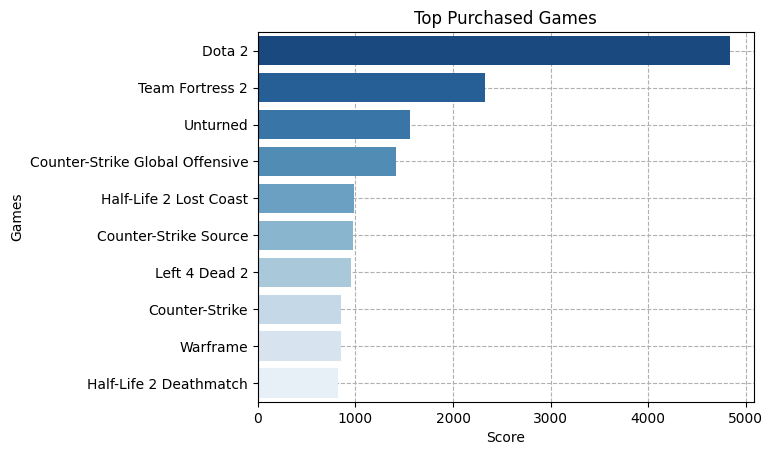

In [ ]:
plot_non_personalized_recommendations(top_purchased_games, x='n_purchases', y='item_id', title='Top Purchased Games')

<ipython-input-72-bd9d27bc6cf6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x=x, y=y, palette='Blues_r', zorder=2)


<Axes: title={'center': 'Top Played Games'}, xlabel='Score', ylabel='Games'>

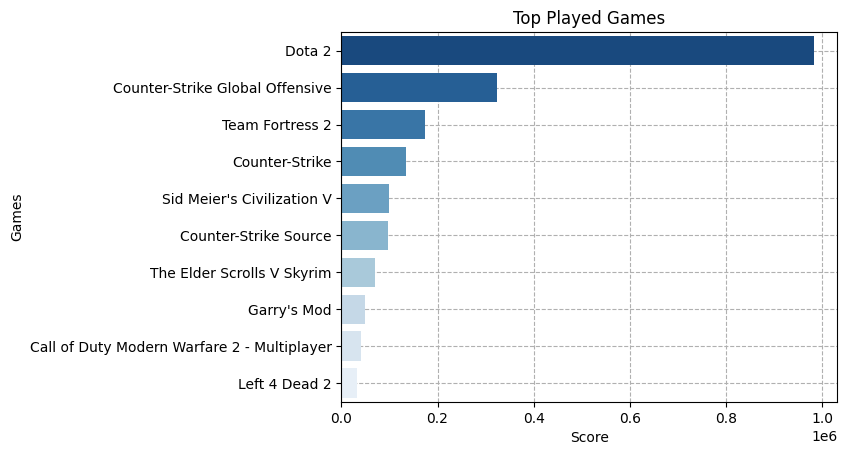

In [ ]:
plot_non_personalized_recommendations(top_played_games, x='n_hours_played', y='item_id', title='Top Played Games')

<ipython-input-72-bd9d27bc6cf6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x=x, y=y, palette='Blues_r', zorder=2)


<Axes: title={'center': 'Also Played Games'}, xlabel='Score', ylabel='Games'>

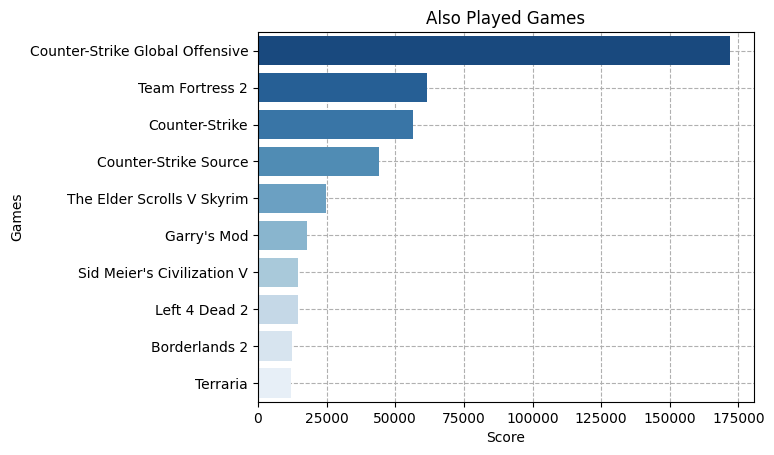

In [ ]:
plot_non_personalized_recommendations(also_played_games, x='hours', y='item_id', title='Also Played Games')

# Personalized Recommendations

In [ ]:
df.head()

,user_id,item_id,behaviour,hours
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0


## Preference Score

Preference score (_rating_) from user $u$ to item $i$:

$$r_{\mathbf{ui}} = \frac{hours\ \mathbf{u}\ played\ in\ game\ \mathbf{i}}{total\ hours\ \mathbf{u}\ played}$$

Preference matrix:

$$
\mathbf{R} = \begin{equation}
\begin{pmatrix}
  r_{11}       & r_{21}   & \cdots  & r_{1i} \\
  r_{21}       & r_{22}   & \cdots  & r_{2i} \\
  \vdots       & \vdots   & \ddots  & \vdots \\
  r_{u1}       & r_{u2}   & \cdots  & r_{ui} \\
\end{pmatrix}
\end{equation}
$$

Compute total played hours per user

In [ ]:
df_user_total_played = (
    df
    .query('behaviour == "play"')
    .groupby('user_id')['hours']
    .sum()
    .to_frame('total_hours_played')
)

df_user_total_played.head()

,total_hours_played
user_id,
5250,225.5
76767,1227.0
86540,255.0
144736,0.1
181212,2.2


Compute total hours played per user for each item

In [ ]:
df_user_item_played = (
    df
    .query('behaviour == "play"')
    .groupby(['user_id','item_id'])['hours']
    .sum()
    .to_frame('hours_played')
)

df_user_item_played.head(10)

hours_played
user_id item_id                                   
5250    Alien Swarm                            4.9
        Cities Skylines                      144.0
        Deus Ex Human Revolution              62.0
        Dota 2                                 0.2
        Portal 2                              13.6
        Team Fortress 2                        0.8
76767   Age of Empires II HD Edition          13.1
        Alien Swarm                            0.8
        Banished                              24.0
        Call of Duty Black Ops                22.0

Compute ratings

In [ ]:
pd.options.display.float_format = lambda x: f'{x * 100:.2f}%'

In [ ]:
df_ratings = (
    df_user_item_played
    .join(df_user_total_played, on='user_id')
)

df_ratings['rating'] = df_ratings['hours_played'] / df_ratings['total_hours_played']

df_ratings.drop(columns=['hours_played','total_hours_played'], inplace=True)
df_ratings.reset_index(inplace=True)

df_ratings.head(50)

,user_id,item_id,rating
0,5250,Alien Swarm,2.17%
1,5250,Cities Skylines,63.86%
2,5250,Deus Ex Human Revolution,27.49%
3,5250,Dota 2,0.09%
4,5250,Portal 2,6.03%
...,...,...,...
45,229911,Call of Duty Black Ops - Multiplayer,0.72%
46,229911,Call of Duty Modern Warfare 2,11.27%
47,229911,Call of Duty Modern Warfare 2 - Multiplayer,27.91%
48,229911,Counter-Strike,11.52%


## Preference Matrix

Create preference matrix

In [ ]:
df_preference_matrix = (
    df_ratings
    .pivot(index='user_id', columns='item_id', values='rating')
    .fillna(0)
    .astype(np.float16)
)

df_preference_matrix

item_id,007 Legends,0RBITALIS,1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),10 Second Ninja,"10,000,000",100% Orange Juice,1000 Amps,12 Labours of Hercules,12 Labours of Hercules II The Cretan Bull,12 Labours of Hercules III Girl Power,...,rFactor,rFactor 2,realMyst,realMyst Masterpiece Edition,resident evil 4 / biohazard 4,rymdkapsel,sZone-Online,the static speaks my name,theHunter,theHunter Primal
user_id,,,,,,,,,,,,,,,,,,,,,
5250,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
76767,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
86540,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
144736,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
181212,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309434439,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
309554670,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
309626088,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


Plot matrix sparsity

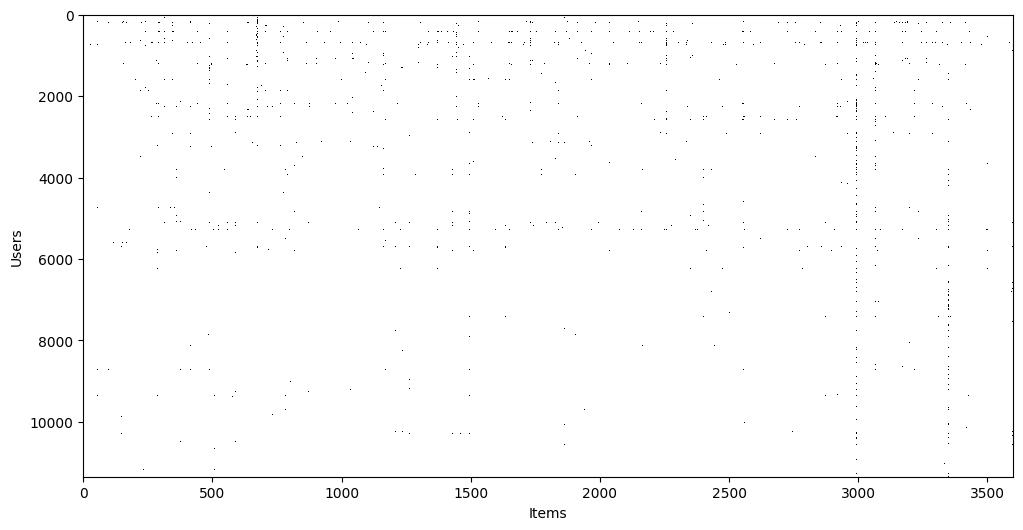

In [ ]:
# plot_matrix_sparsity
def plot_matrix_sparsity(df_matrix, ax=None, figsize=(12, 6)):
  """Plots each filled value of the matrix as a dot"""
  # Instantiate axis if not available
  if ax is None:
    fig, ax = plt.subplots(figsize=figsize)
  # Plot
  ax.spy(df_matrix, aspect='auto')
  ax.set(xlabel='Items', ylabel='Users')
  ax.xaxis.tick_bottom()
  return ax

plot_matrix_sparsity(df_preference_matrix);

## Item-based Collaborative Filtering

**Concept:** "Users who liked this item also liked..."

Compute item-similarity matrix

In [ ]:
df_preference_matrix.head()

item_id,007 Legends,0RBITALIS,1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),10 Second Ninja,"10,000,000",100% Orange Juice,1000 Amps,12 Labours of Hercules,12 Labours of Hercules II The Cretan Bull,12 Labours of Hercules III Girl Power,...,rFactor,rFactor 2,realMyst,realMyst Masterpiece Edition,resident evil 4 / biohazard 4,rymdkapsel,sZone-Online,the static speaks my name,theHunter,theHunter Primal
user_id,,,,,,,,,,,,,,,,,,,,,
5250,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
76767,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
86540,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
144736,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
181212,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


In [ ]:
pd.DataFrame(
    cosine_similarity(df_preference_matrix.T),
    index=df_preference_matrix.columns,
    columns=df_preference_matrix.columns
)

item_id,007 Legends,0RBITALIS,1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),10 Second Ninja,"10,000,000",100% Orange Juice,1000 Amps,12 Labours of Hercules,12 Labours of Hercules II The Cretan Bull,12 Labours of Hercules III Girl Power,...,rFactor,rFactor 2,realMyst,realMyst Masterpiece Edition,resident evil 4 / biohazard 4,rymdkapsel,sZone-Online,the static speaks my name,theHunter,theHunter Primal
item_id,,,,,,,,,,,,,,,,,,,,,
007 Legends,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
0RBITALIS,0.00%,100.00%,0.00%,7.77%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),0.00%,0.00%,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
10 Second Ninja,0.00%,7.77%,0.00%,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
"10,000,000",0.00%,0.00%,0.00%,0.00%,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rymdkapsel,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,100.00%,0.00%,0.00%,0.00%,0.00%
sZone-Online,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,100.00%,0.00%,0.00%,0.00%
the static speaks my name,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,100.00%,0.00%,0.00%


In [ ]:
df_preference_matrix.head()

item_id,007 Legends,0RBITALIS,1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),10 Second Ninja,"10,000,000",100% Orange Juice,1000 Amps,12 Labours of Hercules,12 Labours of Hercules II The Cretan Bull,12 Labours of Hercules III Girl Power,...,rFactor,rFactor 2,realMyst,realMyst Masterpiece Edition,resident evil 4 / biohazard 4,rymdkapsel,sZone-Online,the static speaks my name,theHunter,theHunter Primal
user_id,,,,,,,,,,,,,,,,,,,,,
5250,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
76767,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
86540,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
144736,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
181212,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


In [ ]:
# compute_item_similarity_matrix

def compute_item_similarity_matrix(df_preference_matrix: pd.DataFrame, selected_users: np.array=None):

    item_ids = df_preference_matrix.columns

    if selected_users is None:
        selected_users = df_preference_matrix.index

    similarity_matrix = cosine_similarity(df_preference_matrix.loc[selected_users].T)
    similarity_matrix = pd.DataFrame(similarity_matrix, index=item_ids, columns=item_ids)

    return similarity_matrix

item_similarity_matrix = compute_item_similarity_matrix(df_preference_matrix)
item_similarity_matrix.head()

item_id,007 Legends,0RBITALIS,1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),10 Second Ninja,"10,000,000",100% Orange Juice,1000 Amps,12 Labours of Hercules,12 Labours of Hercules II The Cretan Bull,12 Labours of Hercules III Girl Power,...,rFactor,rFactor 2,realMyst,realMyst Masterpiece Edition,resident evil 4 / biohazard 4,rymdkapsel,sZone-Online,the static speaks my name,theHunter,theHunter Primal
item_id,,,,,,,,,,,,,,,,,,,,,
007 Legends,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
0RBITALIS,0.00%,100.00%,0.00%,7.77%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),0.00%,0.00%,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
10 Second Ninja,0.00%,7.77%,0.00%,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
"10,000,000",0.00%,0.00%,0.00%,0.00%,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


### Recoment items to target item

In [ ]:
def recommend_most_similar_items(item_similarity_matrix, item_id, n):

    most_similar_items = (
        item_similarity_matrix.loc[item_id]
        .drop(item_id)
        .sort_values(ascending=False)
        .head(n)
    )

    return most_similar_items

# Apply function
recommend_most_similar_items(item_similarity_matrix, item_id='Dota 2', n=10)

,Dota 2
item_id,
Disciples II Gallean's Return,1.81%
Counter-Strike Global Offensive,1.78%
Devil May Cry 4 Special Edition,1.69%
Defend Your Life,1.58%
how do you Do It?,1.57%
Adventures of Bertram Fiddle Episode 1 A Dreadly Business,1.54%
Nancy Drew Last Train to Blue Moon Canyon,1.52%
Nancy Drew Danger on Deception Island,1.52%
Nancy Drew Shadow at the Water's Edge,1.52%


### Recoment items to target user

Predict user item ratings (for recommend items to users)

In [ ]:
# predict_ratings_based_on_item_similarity

def predict_ratings_based_on_item_similarity(df_preference_matrix: pd.DataFrame, item_similarity_matrix: pd.DataFrame) -> pd.DataFrame:
    return df_preference_matrix.dot(item_similarity_matrix) / item_similarity_matrix.abs().sum(1)

# Generate predicted ratings matrix
predicted_ratings_item_based = predict_ratings_based_on_item_similarity(df_preference_matrix, item_similarity_matrix)
predicted_ratings_item_based.head()

item_id,007 Legends,0RBITALIS,1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),10 Second Ninja,"10,000,000",100% Orange Juice,1000 Amps,12 Labours of Hercules,12 Labours of Hercules II The Cretan Bull,12 Labours of Hercules III Girl Power,...,rFactor,rFactor 2,realMyst,realMyst Masterpiece Edition,resident evil 4 / biohazard 4,rymdkapsel,sZone-Online,the static speaks my name,theHunter,theHunter Primal
user_id,,,,,,,,,,,,,,,,,,,,,
5250,0.00%,0.02%,0.05%,0.12%,0.04%,0.01%,0.02%,0.00%,0.00%,0.00%,...,0.02%,NaN,0.00%,0.00%,0.07%,0.00%,0.02%,0.09%,0.04%,0.00%
76767,0.02%,0.00%,0.01%,0.00%,0.00%,0.02%,0.00%,0.02%,0.00%,0.00%,...,0.30%,NaN,0.00%,0.00%,0.13%,0.01%,0.09%,0.02%,0.15%,0.01%
86540,0.01%,0.00%,0.04%,0.00%,0.04%,0.02%,0.11%,0.02%,0.03%,0.01%,...,0.02%,NaN,0.00%,0.01%,0.07%,0.00%,0.03%,0.14%,0.05%,0.00%
144736,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.06%,0.00%,0.00%,...,0.00%,NaN,0.00%,0.00%,0.00%,0.00%,0.18%,0.04%,0.01%,0.00%
181212,0.00%,0.00%,0.02%,0.00%,0.00%,0.01%,0.01%,0.05%,0.00%,0.00%,...,0.00%,NaN,0.00%,0.00%,0.07%,0.00%,0.15%,0.03%,0.01%,0.00%


In [ ]:
def recommend_items_item_based(user_id: int, df_preference_matrix: pd.DataFrame, predicted_ratings_item_based: pd.DataFrame, n: int=5):

    # Real ratings
    user_id = 5250

    # Get real ratings/interactions of the user
    user_real_rating = df_preference_matrix.loc[user_id]

    # Get items that the user hans't rated or interacted with
    unrated_items = user_real_rating[(user_real_rating.isnull()) | (user_real_rating == 0)]

    # Get predited ratings for these unrated items
    user_predicted_ratings_for_unrated = predicted_ratings_item_based.loc[user_id, unrated_items.index]

    # Sort the unrated items based on predicted ratings
    recommended_items = user_predicted_ratings_for_unrated.sort_values(ascending=False).head(10).index.tolist()

    return recommended_items

recommend_items_item_based(5250, df_preference_matrix, predicted_ratings_item_based)

['WWE 2K15',
 'NBA 2K16',
 'Automation - The Car Company Tycoon Game',
 'FINAL FANTASY XI',
 "King's Bounty Warriors of the North",
 "Chris Sawyer's Locomotion",
 'Project Zomboid',
 'Software Inc.',
 'StarMade',
 'Duke Nukem Forever ']

### Filter most active users

In [ ]:
df_ratings.head()

,user_id,item_id,rating
0,5250,Alien Swarm,2.17%
1,5250,Cities Skylines,63.86%
2,5250,Deus Ex Human Revolution,27.49%
3,5250,Dota 2,0.09%
4,5250,Portal 2,6.03%


,user_id,item_id,behaviour,hours
1,151603712,The Elder Scrolls V Skyrim,play,27300.00%
3,151603712,Fallout 4,play,8700.00%
5,151603712,Spore,play,1490.00%
7,151603712,Fallout New Vegas,play,1210.00%
9,151603712,Left 4 Dead 2,play,890.00%
...,...,...,...,...
199991,128470551,Fallen Earth,play,240.00%
199993,128470551,Magic Duels,play,220.00%
199995,128470551,Titan Souls,play,150.00%
199997,128470551,Grand Theft Auto Vice City,play,150.00%


In [ ]:
# Filter most active users
n_users = 2000

# most_active_users
most_active_users = (
    df.query('behaviour=="play"')
    .groupby('user_id')
    .hours.sum()
    .sort_values(ascending=False)
    .head(n_users)
)

most_active_users[:10]

,hours
user_id,
73017395,1175400.00%
10599862,1165170.00%
100630947,1085320.00%
26762388,1047010.00%
153382649,964000.00%
43684632,954630.00%
48798067,942720.00%
52731290,941760.00%
42935819,817290.00%


## User-based collaborative filtering

**Concept:** "Users who are similar to X also liked..."

In [ ]:
# Get item similarity
item_similarity_matrix = compute_item_similarity_matrix(df_preference_matrix, selected_users=most_active_users.index)

# Recommend
recommend_most_similar_items(item_similarity_matrix, item_id='Dota 2', n=10)

,Dota 2
item_id,
Free to Play,11.09%
Counter-Strike Global Offensive,6.74%
S.K.I.L.L. - Special Force 2,5.45%
FreeStyle2 Street Basketball,5.04%
Golden Rush,4.92%
Disciples II Gallean's Return,4.91%
Archeblade,4.76%
Ragnarok,4.64%
Devil May Cry 4 Special Edition,4.59%


In [ ]:
# Recomend by user
predicted_ratings = predict_ratings_based_on_item_similarity(df_preference_matrix, item_similarity_matrix)
recommend_items_item_based(5250, df_preference_matrix, predicted_ratings)

['WWE 2K15',
 'NBA 2K16',
 'Automation - The Car Company Tycoon Game',
 'FINAL FANTASY XI',
 "King's Bounty Warriors of the North",
 "Chris Sawyer's Locomotion",
 'Project Zomboid',
 'Software Inc.',
 'StarMade',
 'Duke Nukem Forever ']

# Scikit-Surprise

## Prepare data

In [ ]:
from surprise import Dataset, Reader
from surprise import SVD, KNNWithMeans
from surprise.accuracy import rmse, mae
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV

In [ ]:
# Define the scale of your ratings
reader = Reader(rating_scale=(0, 1))

# Load the dataframe into a Dataset object
data = Dataset.load_from_df(df_ratings[['user_id', 'item_id', 'rating']], reader)
display(data)

In [ ]:
df_ratings.head()

,user_id,item_id,rating
0,5250,Alien Swarm,2.17%
1,5250,Cities Skylines,63.86%
2,5250,Deus Ex Human Revolution,27.49%
3,5250,Dota 2,0.09%
4,5250,Portal 2,6.03%


In [ ]:
# Show first 5 raw observations
data.raw_ratings[:5]

[(5250, 'Alien Swarm', 0.02172949002217295, None),
 (5250, 'Cities Skylines', 0.6385809312638581, None),
 (5250, 'Deus Ex Human Revolution', 0.2749445676274945, None),
 (5250, 'Dota 2', 0.0008869179600886918, None),
 (5250, 'Portal 2', 0.06031042128603104, None)]

## Item-based collaborative filtering

In [ ]:
# Split dataset
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

# Similarity options
sim_options = {
    'name': 'cosine',
    'user_based': False  # This makes it item-based
}

# Instantiate model
model = KNNWithMeans(sim_options=sim_options)

# Train model
model.fit(trainset)

# Predict test data
predictions = model.test(testset)

# Compute model metrics
mae(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.1758


0.17576958926005173

## User-based collaborative filtering

In [ ]:
# Similarity options
sim_options = {
    'name': 'cosine',
    'user_based': True
}

# Instantiate model
model = KNNWithMeans(sim_options=sim_options)

# Train model
model.fit(trainset)

# Predict test data
predictions = model.test(testset)

# Compute model metrics
mae(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.1644


0.16436777697884933

In [ ]:
predictions[0]

Prediction(uid=86499586, iid='Counter-Strike Source', r_ui=0.013649425287356323, est=0.06643402441120896, details={'actual_k': 40, 'was_impossible': False})

## Model-based Collaborative Filtering

In [ ]:
# Instantiate model
model = SVD()

# Train model
model.fit(trainset)

# Predict test data
predictions = model.test(testset)

# Print first prediction
print(predictions[0])

# Compute model metrics
mae(predictions)

user: 86499586   item: Counter-Strike Source r_ui = 0.01   est = 0.39   {'was_impossible': False}
MAE:  0.1423


0.1422799732717009

In [ ]:
# Using cross validation instead of train-test-split
result = cross_validate(model, data, measures=["RMSE", "MAE"], cv=10, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.2489  0.2516  0.2459  0.2459  0.2439  0.2530  0.2514  0.2475  0.2464  0.2457  0.2480  0.0029  
MAE (testset)     0.1420  0.1444  0.1390  0.1392  0.1395  0.1444  0.1441  0.1406  0.1403  0.1396  0.1413  0.0021  
Fit time          1.23    1.70    1.62    1.22    1.26    1.23    1.20    1.22    1.20    1.51    1.34    0.18    
Test time         0.05    0.07    0.04    0.04    0.04    0.04    0.07    0.04    0.04    0.07    0.05    0.01    


In [ ]:
pd.Series(df_ratings.user_id.unique()).sample(1)

In [ ]:
prediction = model.predict(121168851, 'Dota 2')
prediction

Prediction(uid=121168851, iid='Dota 2', r_ui=None, est=0.9673625826078496, details={'was_impossible': False})

# Playground

In [ ]:
from ipywidgets import interact

In [ ]:
unique_users = df_ratings.user_id.unique().tolist()
unique_items = df_ratings.item_id.unique().tolist()

In [ ]:
@interact(user_id=unique_users, item_id=unique_items)
def get_prediction(user_id, item_id):
    prediction = model.predict(user_id, item_id)
    return prediction.est

interactive(children=(Dropdown(description='user_id', options=(5250, 76767, 86540, 144736, 181212, 229911, 298…